In [1]:
import pandas as pd

In [8]:
data = pd.read_excel('../Downloads/Online Retail.xlsx')

In [47]:
data.to_csv('retail.csv')

In [25]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [32]:
txns=data.groupby(['InvoiceNo','CustomerID','InvoiceDate']).median()

In [37]:
txns=txns['Quantity']*txns['UnitPrice']

In [40]:
txns=pd.DataFrame(txns)

In [44]:
txns.columns=['spend']

In [65]:
txns=txns.reset_index()

In [67]:
diff=txns.groupby(['CustomerID'])['InvoiceDate'].apply(lambda x: x.diff()).dt.days

In [73]:
df=pd.DataFrame(zip(txns['CustomerID'],diff),columns=['cust_id','days'])

In [76]:
df=df.dropna()

In [84]:
df=df[df['days']>0]

In [91]:
tmp=df.groupby(['cust_id'])['days'].apply(list)

In [259]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText


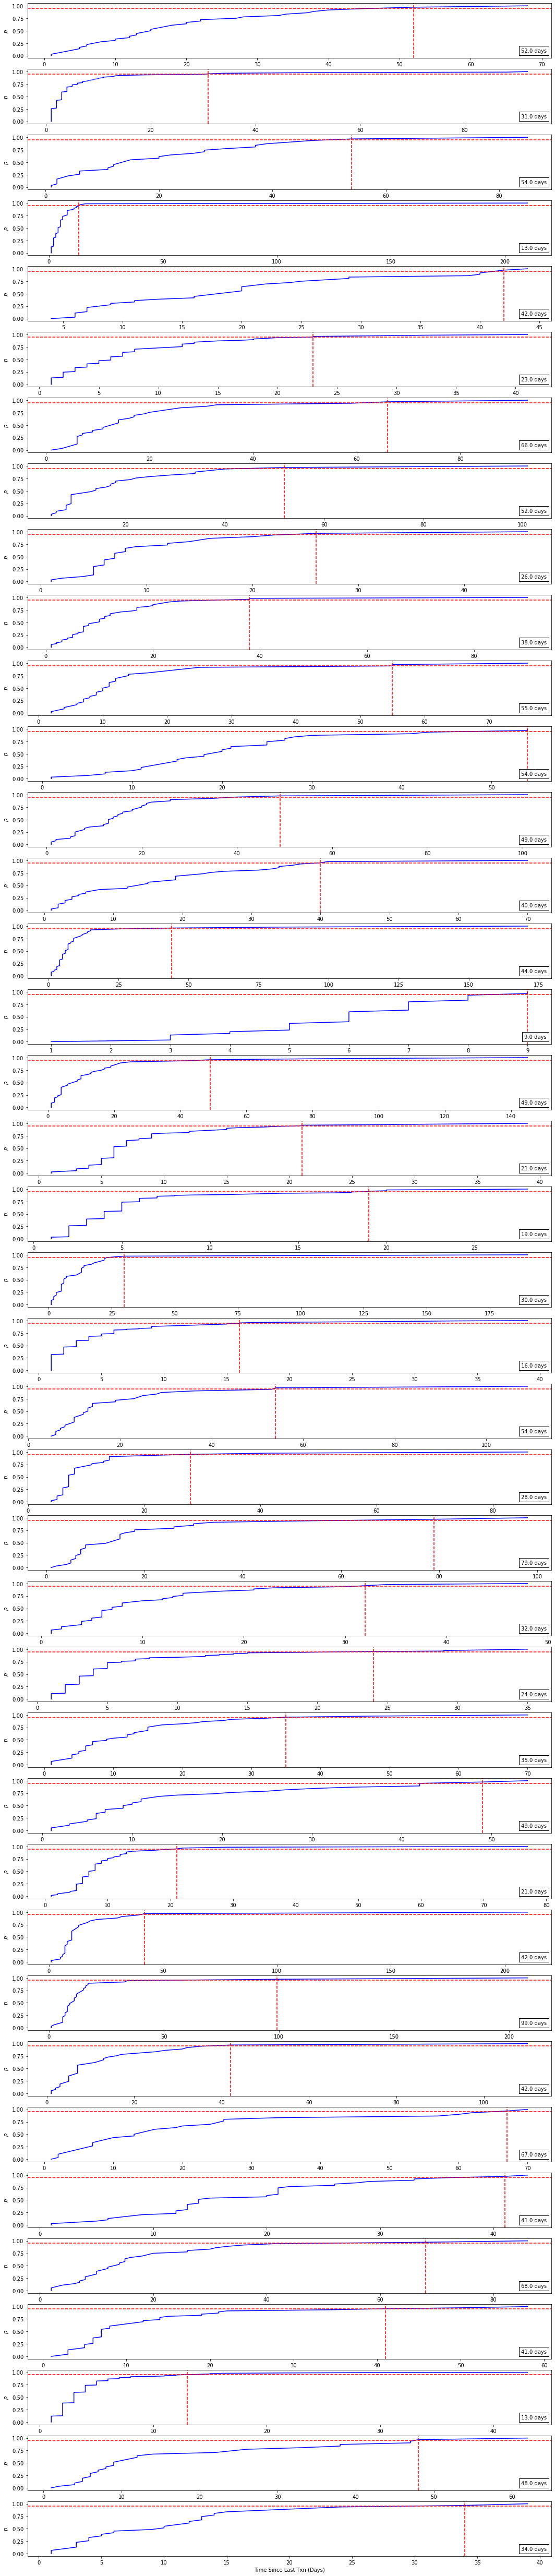

In [263]:
i=-1
fig, axs = plt.subplots(39,figsize=(18,90))

for idx in range(len(tmp)):
    if(len(tmp.iloc[idx])>30):
        y=tmp.iloc[idx]

        i=i+1 
        data_sorted = np.sort(y)
        # calculate the proportional values of samples
        p = 1. * np.arange(len(y)) / (len(y) - 1)
        axs.flat[i].plot(data_sorted, p,color='blue')

        axs.flat[i].set_xlabel('Time Since Last Txn (Days)')
        axs.flat[i].set_ylabel('$p$')
        axs.flat[i].axhline(y = 0.95, color = 'r', linestyle = '--')
        axs.flat[i].axvline(x = data_sorted[p>0.95][0], color = 'r', linestyle = '--')
        anchored_text = AnchoredText(str(data_sorted[p>0.95][0])+' days', loc=4)

        axs.flat[i].add_artist(anchored_text)
        # rendering the plot
#         plt.show()

plt.savefig("out.pdf")
